In [1]:
"""The data contains lists of octamers (8 amino acids) and a flag (-1 or 1) 
    depending on whether HIV-1 protease will cleave in the central position (between amino acids 4 and 5)."""

'The data contains lists of octamers (8 amino acids) and a flag (-1 or 1) \n    depending on whether HIV-1 protease will cleave in the central position (between amino acids 4 and 5).'

In [2]:
# import libraries
import os
import pandas as pd
import numpy as np
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# feature scaling
from sklearn.preprocessing import StandardScaler
# for handling categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
# for logistic regression model
from sklearn.svm import SVC

# import function python file
import importlib.util
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc

from matplotlib import pyplot as plt

In [4]:
# importing template file 
spec = importlib.util.spec_from_file_location("function", "/home/admin1/PycharmProjects/Machine-Learning-Followship-Program/week_11/Utility/common_function.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
object_common_function = foo.function()


In [5]:
# Import dataset
# dataset = pd.read_csv("Social_Network_Ads.csv")
dataset = pd.read_csv("Data/1625Data.txt",delimiter=",",names=["Peptides", "Result"])
dataset.head()

,Peptides,Result
0,SLNLRETN,1
1,AECFRIFD,1
2,HLVEALYL,1
3,TQIMFETF,1
4,AEELAEIF,1


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Result,1625.0,-0.538462,0.842909,-1.0,-1.0,-1.0,-1.0,1.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 2 columns):
Peptides    1625 non-null object
Result      1625 non-null int64
dtypes: int64(1), object(1)
memory usage: 25.5+ KB


In [8]:
# Seperate all amino acids
peptides = np.array([[dataset["Peptides"][i][j] for i in range(dataset.shape[0])] for j in range(8)])
peptides.shape
print(peptides)

[['S' 'A' 'H' ... 'Q' 'D' 'S']
 ['L' 'E' 'L' ... 'A' 'S' 'K']
 ['N' 'C' 'V' ... 'I' 'A' 'D']
 ...
 ['E' 'I' 'L' ... 'A' 'E' 'A']
 ['T' 'F' 'Y' ... 'L' 'E' 'E']
 ['N' 'D' 'L' ... 'Q' 'D' 'I']]


In [9]:
# Store the seperated amino acids into a dataframe
dataset_One = pd.DataFrame(peptides.T, columns=list('ABCDEFGH'))
dataset_One.shape
dataset_One.head()

,A,B,C,D,E,F,G,H
0,S,L,N,L,R,E,T,N
1,A,E,C,F,R,I,F,D
2,H,L,V,E,A,L,Y,L
3,T,Q,I,M,F,E,T,F
4,A,E,E,L,A,E,I,F


In [10]:
# dataset = dataset.join(dataset_One)
dataset = pd.concat([dataset, dataset_One], axis=1)
dataset.head()

,Peptides,Result,A,B,C,D,E,F,G,H
0,SLNLRETN,1,S,L,N,L,R,E,T,N
1,AECFRIFD,1,A,E,C,F,R,I,F,D
2,HLVEALYL,1,H,L,V,E,A,L,Y,L
3,TQIMFETF,1,T,Q,I,M,F,E,T,F
4,AEELAEIF,1,A,E,E,L,A,E,I,F


In [11]:
# drop unwanted col

dataset = dataset.drop(columns="Peptides", axis=0)
dataset.head()

,Result,A,B,C,D,E,F,G,H
0,1,S,L,N,L,R,E,T,N
1,1,A,E,C,F,R,I,F,D
2,1,H,L,V,E,A,L,Y,L
3,1,T,Q,I,M,F,E,T,F
4,1,A,E,E,L,A,E,I,F


In [12]:
# rearrange col dataset
dataset = dataset[['A','B','C','D','E','F','G','H','Result']]
dataset.head()

,A,B,C,D,E,F,G,H,Result
0,S,L,N,L,R,E,T,N,1
1,A,E,C,F,R,I,F,D,1
2,H,L,V,E,A,L,Y,L,1
3,T,Q,I,M,F,E,T,F,1
4,A,E,E,L,A,E,I,F,1


In [13]:
# x = dataset.iloc[:,1:].values
x = dataset.loc[:, dataset.columns != 'Result']
y = dataset.iloc[:,-1]

In [14]:
# print("Feature after  :\n", list(dataset.columns))
# data_dummies = pd.get_dummies(dataset)
# print("Feature after one-hotencoding :\n", list(data_dummies.columns))
# dataset = data_dummies


In [15]:
print("dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1]))

dataset has 1625 rows and 9 Columns


In [16]:
# dataset= pd.DataFrame(dataset)

In [17]:
dataset.head()

,A,B,C,D,E,F,G,H,Result
0,S,L,N,L,R,E,T,N,1
1,A,E,C,F,R,I,F,D,1
2,H,L,V,E,A,L,Y,L,1
3,T,Q,I,M,F,E,T,F,1
4,A,E,E,L,A,E,I,F,1


In [28]:
os.mkdir("CSV_files")

In [19]:
object_common_function.splitdata(dataset,0.30,0.40,"CSV_files")

train :  (1137, 9)  test :  (488, 9)
train_data :  (682, 9)  crossV_data :  (455, 9)


In [20]:
# load train dataset

train_data = object_common_function.load_data("CSV_files/train_file.csv")
print("train_data has {} rows and {} Columns".format(train_data.shape[0],train_data.shape[1]))

train_data has 682 rows and 9 Columns


In [21]:
# check information 

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 9 columns):
A         682 non-null object
B         682 non-null object
C         682 non-null object
D         682 non-null object
E         682 non-null object
F         682 non-null object
G         682 non-null object
H         682 non-null object
Result    682 non-null int64
dtypes: int64(1), object(8)
memory usage: 48.0+ KB


In [22]:
train_data.head()

,A,B,C,D,E,F,G,H,Result
0,I,V,I,Y,Q,Y,M,D,-1
1,F,V,H,E,S,L,A,D,-1
2,S,Q,N,I,P,I,V,Q,-1
3,G,Q,V,N,F,L,G,K,1
4,Q,D,E,I,Q,N,M,K,-1


In [23]:
train_data.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Result'], dtype='object')

In [24]:
# x = dataset.iloc[:,1:].values
x_train = dataset.loc[:, dataset.columns != 'Result']
y_train = dataset.iloc[:,dataset.columns == 'Result']

In [25]:
x_train=object_common_function.one_hot_encoding(x_train)

In [26]:
x_train= pd.DataFrame(x_train)


 confusion_matrix
 [[1248    2]
 [   4  371]]


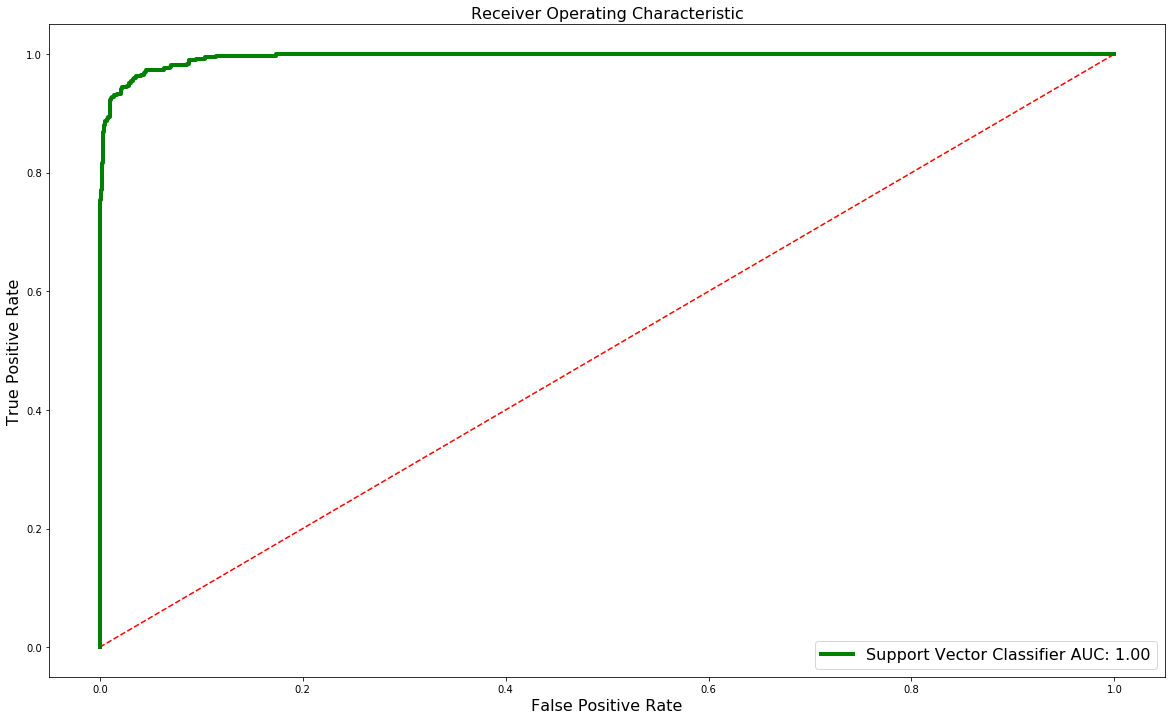

Accuracy: accuracy_score : 99.63076923076923
Accuracy: average_precision_score : 98.64901354231112
Accuracy:  balanced_accuracy_score : 99.38666666666667
Accuracy:  hamming_loss : 0.3692307692307692
Accuracy:  fbeta_score : 99.63076923076922
pickel file create


In [27]:
class Support_Vector_Machine:
    
    # feature scaling
    
    def feature_scale(self,x_train):
        sc_x = StandardScaler()
        x_train = sc_x.fit_transform(x_train)
        return x_train
    
    # fit logistic regression model
    
    def fit_model(self,x_train,y_train):
        classifier = SVC(kernel='linear', random_state= 0,probability=True)
        classifier.fit(x_train,y_train)
        return classifier
    
    # confusion matrix
    
    def confusion_matrix(self,y_train,y_predict): 
        cm = confusion_matrix(y_train,y_predict)
        return cm
    
    def roc_curves(self,x_train,y_train,classifier):
        plt.figure(figsize = (20, 12))
        # Random Model
        plt.plot([0,1], [0,1], 'r--')
        probs = classifier.predict_proba(x_train)
        # Reading probability of second class (Salary >= $200K)
        probs = probs[:, 1]
        fpr, tpr, thresholds = roc_curve(y_train, probs)
        roc_auc = auc(fpr, tpr)

        label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
        plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
        plt.xlabel('False Positive Rate', fontsize = 16)
        plt.ylabel('True Positive Rate', fontsize = 16)
        plt.title('Receiver Operating Characteristic', fontsize = 16)
        plt.legend(loc = 'lower right', fontsize = 16)
        plt.show()
    
    def cap_curves(self,x_train,y_train,classifier):
        total = len(y_train)
        ## 168
        class_1_count = np.sum(y_train)
        ## 70
        class_0_count = total - class_1_count
        ## 98
        plt.figure(figsize = (20, 12))
       
        #Random Model
        plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
       
        #Perfect Model
        plt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], c = 'grey', linewidth = 2, label = 'Perfect Model')
       
        #Trained Model (Support Vector Classifier)
        probs = classifier.predict_proba(x_train)
       
        probs = probs[:, 1]
        model_y = [y for _, y in sorted(zip(probs, y_train), reverse = True)]
        ###############
        y_values = np.cumsum(np.asarray(model_y, dtype=float))
        ###############
        
        y_values = np.append([0], np.cumsum(model_y))
        x_values = np.arange(0, total + 1)
       
        plt.plot(x_values, y_values, c = 'b', label = 'Support Vector Classifier', linewidth = 4)
        # Plot information
        plt.xlabel('Total observations', fontsize = 16)
        plt.ylabel('Class 1 observations', fontsize = 16)
        plt.title('Cumulative Accuracy Profile', fontsize = 16)
        plt.legend(loc = 'lower right', fontsize = 16)
       
        # Area under Random Model
        a = auc([0, total], [0, class_1_count])
        # Area between Perfect and Random Model
        aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a
        # Area between Trained and Random Model
        aR = auc(x_values, y_values) - a
        print("\n Accuracy Rate for Support Vector Classifier: {}".format(aR / aP))
      
        """CAP Analysis using Plot
        Another method to analyse the CAP Curve involves reading the plot we generated above"""
        # Point where vertical line will cut trained model
        index = int((50*total / 100))

        ## 50% Verticcal line from x-axis
        plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

        ## Horizontal line to y-axis from prediction model
        plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

        class_1_observed = y_values[index] * 100 / max(y_values)
        print("class_1_observed", class_1_observed)
        plt.show()

def main(x_train,y_train):
    
    # object
    object_LR = Support_Vector_Machine()
    
    # call function
    x_train_data = object_LR.feature_scale(x_train)
        
    classifier = object_LR.fit_model(x_train_data,y_train)
    
    y_predict = object_common_function.prediction(x_train_data,classifier)
    
    confusion_mat = object_LR.confusion_matrix(y_train,y_predict)
    print("\n confusion_matrix\n",confusion_mat )
    
    object_LR.roc_curves(x_train,y_train,classifier)
    
#     object_LR.cap_curves(x_train,y_train,classifier)
    
#     object_common_function.visualisation(x_train_data,y_train,classifier)
    
    accuracy,accuracy1,accuracy2,accuracy3,acc = object_common_function.Accuracy(y_train,y_predict)
#     print("Accuracy : ",accuracy,accuracy1,accuracy2,accuracy3,acc)
    
    object_common_function.pickel_file(classifier,'trainmodel.pkl')
    print("pickel file create")

if __name__ == '__main__':
    main(x_train,y_train)